# Repasando clase anterior, market beta

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import random

In [35]:
# Get tickers
tickers = ['VTI', 'BRK-A', 'AMZN']
start_date = '2015-01-01'
end_date = "2024-10-01"

# Descargar precios y graficar
St = yf.download(tickers, start=start_date)['Adj Close']

returns = St.pct_change().dropna()


[*********************100%%**********************]  3 of 3 completed


In [36]:
# Normalice Amazon y Berkshiere
St["normalized_VTI"] = St.VTI / St.VTI.iloc[0]
St["normalized_BRK-A"] = St["BRK-A"] / St["BRK-A"].iloc[0]
St["normalized_AMZN"] = St.AMZN / St.AMZN.iloc[0]

Text(0, 0.5, '$E[x]$')

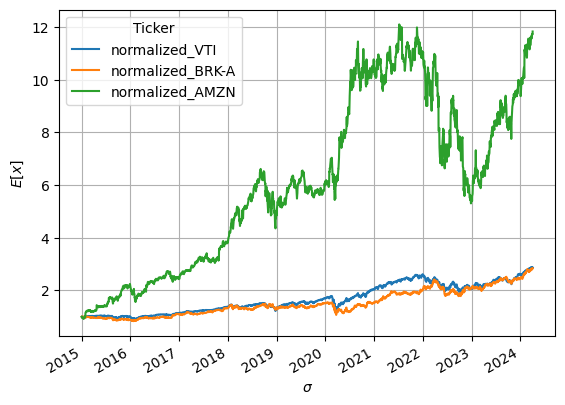

In [37]:
# Grafique Amazon y Berkshiere
St[["normalized_VTI", "normalized_BRK-A", "normalized_AMZN"]].plot()
plt.grid()
plt.xlabel("$\sigma$")
plt.ylabel("$E[x]$")

### Calcule la beta de Berkshiere

$$BRK = \beta_0 + \beta_1 * VTI $$

In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = returns[["VTI"]]
y = returns[["BRK-A"]]

model.fit(X, y)

model.coef_[0][0]

0.7948082548303321

In [39]:
predictions_berkshire = model.predict(X)

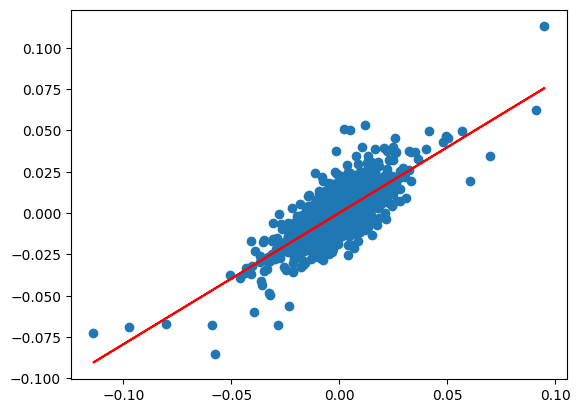

In [40]:
# Grafique las predicciones
plt.scatter(X, y)
plt.plot(X, predictions_berkshire, color="red")

In [41]:
# Obtenga el R2
error_modelo = np.var(predictions_berkshire - y)
error_promedio = np.var(y - np.mean(y))

In [42]:
(error_promedio - error_modelo) / error_promedio

Ticker
BRK-A    0.586203
dtype: float64

In [43]:
# Obtenga el r2 con el paquete
from sklearn.metrics import r2_score
r2_score(y_pred=predictions_berkshire, y_true=y)

0.5862028666291141

### Calcule la beta de Amazon

In [55]:
model = LinearRegression()
X = returns[["VTI"]]
y = returns[["AMZN"]]

model.fit(X, y)

model.coef_[0][0]

1.1152869393498501

In [56]:
predictions_amazon = model.predict(X)

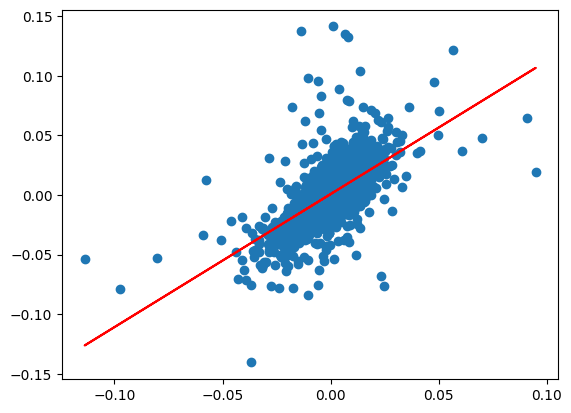

In [57]:
# Grafique la beta de Amazon
plt.scatter(X, y)
plt.plot(X, predictions_amazon, color="red")

In [58]:
# Obtenga el R2 de Amazon
r2_score(y_pred=predictions_amazon, y_true=y)

0.38080298494032216

In [46]:
# Ahora con el paquete


### CAPM

Capital asset pricing model / Modelo de valoración de activos financieros

1- En realidad los inversionistas se interesan por el _risk premium_ que es el diferencial entre el riesgo que están tomando y el rendimiento libre de riesgo (si una inversión me da menos que CETES, mejor ni me meto)

2- En un monto donde lo único que importa para  predecir el rendimiento de un activo es la beta y el $R^2$ es igual a 1, esta igualdad se tiene que cumplir:


$$\frac{E(R_i) - rf}{\beta_i} = E(R_m) - Rf$$


In [59]:
### Ejemplo
rf = 0.05
activo = 0.11
mercado = 0.1

In [60]:
# Calcule la prima de riesgo del mercado
prima_mercado = mercado - rf
prima_mercado

0.05

In [61]:
# Calcule la prima de riesgo del activo
prima_activo = activo - rf
prima_activo

0.06

In [62]:
## Las primas no son iguales
prima_activo == prima_mercado

False

In [63]:
## Si lo unico que importa es la beta y es un factor de escala, en realidad peudo escribir esta ecuación así
beta = 0.06 / 0.05
beta

1.2

$$\frac{0.06}{\beta} = 0.05$$  

In [52]:
## Despejando


In [64]:
## Quiere decir que:
capm = rf + beta*(mercado - rf)
capm

0.11

Despejando, podemos concluir esto:

$$E[r_i] = rf + \beta * (E[m] - rf) $$

In [66]:
### Ejemplo: ¿cuál es el valor esperado del rendimiento anual de Amazon en los siguientes 5 años?

rf = 0.035
beta_amazon = 1.11
market_return = 0.09

capm_amzn = rf + beta_amazon * (market_return - rf)
capm_amzn

0.09605

### Problema 1 del CAPM

1- Como hemos visto en estas dos últimas clases (y verán en su tarea), market beta no explica en un 100% la variación


2- Market beta puede cambiar con el tiempo

In [67]:
# Get tickers
tickers = ['VTI', 'BRK-A', 'AMZN', 'VGT']
start_date = '2015-01-01'
end_date = "2024-10-01"

# Descargar precios y graficar
St = yf.download(tickers, start=start_date)['Adj Close']

returns = St.pct_change().dropna()

[*********************100%%**********************]  4 of 4 completed


In [68]:
returns["date"] = returns.index
returns["year"] = [i.year for i in returns.date]

In [69]:
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

betas = []
r2 = []

for i in years:
    flag_frame = returns.query("year == @i")
    model = LinearRegression()
    X = flag_frame[["VTI"]]
    y = flag_frame[["VGT"]]
    model.fit(X, y)
    # Beta
    beta = model.coef_[0][0]
    betas.append(beta)
    # R2
    predicciones = model.predict(X)
    r2i = r2_score(y_true=y, y_pred=predicciones)
    r2.append(r2i)


In [71]:
df = pd.DataFrame()
df["betas"] = betas
df["r2"] = r2
df

,betas,r2
0,1.082927,0.868036
1,1.112197,0.821972
2,1.230197,0.598636
3,1.313283,0.886136
4,1.327904,0.866075
5,1.089195,0.897165
6,1.283896,0.780832
7,1.317160,0.934073
8,1.222479,0.772200
9,1.489146,0.794550


In [72]:
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

betas = []
r2 = []

for i in years:
    flag_frame = returns.query("year == @i")
    model = LinearRegression()
    X = flag_frame[["VTI"]]
    y = flag_frame[["AMZN"]]
    model.fit(X, y)
    # Beta
    beta = model.coef_[0][0]
    betas.append(beta)
    # R2
    predicciones = model.predict(X)
    r2i = r2_score(y_true=y, y_pred=predicciones)
    r2.append(r2i)


In [73]:
df = pd.DataFrame()
df["betas"] = betas
df["r2"] = r2
df

,betas,r2
0,1.123081,0.261058
1,1.055150,0.229617
2,1.177831,0.153992
3,1.660534,0.592798
4,1.302131,0.513821
5,0.667405,0.352858
6,0.985536,0.310558
7,1.602295,0.634437
8,1.443315,0.349388
9,1.579358,0.464637


In [74]:
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

betas = []
r2 = []

for i in years:
    flag_frame = returns.query("year == @i")
    model = LinearRegression()
    X = flag_frame[["VTI"]]
    y = flag_frame[["BRK-A"]]
    model.fit(X, y)
    # Beta
    beta = model.coef_[0][0]
    betas.append(beta)
    # R2
    predicciones = model.predict(X)
    r2i = r2_score(y_true=y, y_pred=predicciones)
    r2.append(r2i)

In [75]:
df = pd.DataFrame()
df["betas"] = betas
df["r2"] = r2
df

,betas,r2
0,0.867337,0.679100
1,0.775699,0.551992
2,0.935742,0.356484
3,1.034023,0.615279
4,0.861737,0.533535
5,0.819172,0.736025
6,0.622294,0.297070
7,0.700564,0.613089
8,0.673521,0.392242
9,0.434688,0.162072


Amazon ha tenido muchos años de beta poisitivo, pero algunos años han sido de beta bajo

### Teorícamente tiene mucho sentido pensar en market beta, es un hecho que existen acciones sensibles al estado del mercado, el problema es que el mundo y las betas cambian.

A pesar de que es cierto que los rendimientos de un portafolio a largo plazo dependen de su beta, no sabemos como pronosticar el beta futuro.



### Sin embargo, este modelo CAPM es un muy buen modelo mentar para entender como funciona el mercado.